In [181]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [182]:
#Lecture file
data = pd.read_csv('steam-200k.csv')
#data2 = pd.read_csv('SteamCharts.csv')
#data2

In [183]:
#Nettoyage time
cleanTime = data[ data['time_play'] == 1.0 ].index
data.drop(cleanTime, inplace=True)
data


,id,name_game,time_play,nothing
1,151603712,The Elder Scrolls V Skyrim,273.0,0
3,151603712,Fallout 4,87.0,0
5,151603712,Spore,14.9,0
7,151603712,Fallout New Vegas,12.1,0
9,151603712,Left 4 Dead 2,8.9,0
...,...,...,...,...
199991,128470551,Fallen Earth,2.4,0
199993,128470551,Magic Duels,2.2,0
199995,128470551,Titan Souls,1.5,0
199997,128470551,Grand Theft Auto Vice City,1.5,0


In [184]:
#Nettoie nothing
if 'nothing' in data:
    del data['nothing']
data

,id,name_game,time_play
1,151603712,The Elder Scrolls V Skyrim,273.0
3,151603712,Fallout 4,87.0
5,151603712,Spore,14.9
7,151603712,Fallout New Vegas,12.1
9,151603712,Left 4 Dead 2,8.9
...,...,...,...
199991,128470551,Fallen Earth,2.4
199993,128470551,Magic Duels,2.2
199995,128470551,Titan Souls,1.5
199997,128470551,Grand Theft Auto Vice City,1.5


In [185]:

#classement du top des plus jouer sur steam
data = data.sort_values(by='time_play',ascending=False)
#data = data.drop_duplicates(subset='name_game',keep="first")
data_reduce = data.head(40)




<AxesSubplot:xlabel='name_game', ylabel='time_play'>

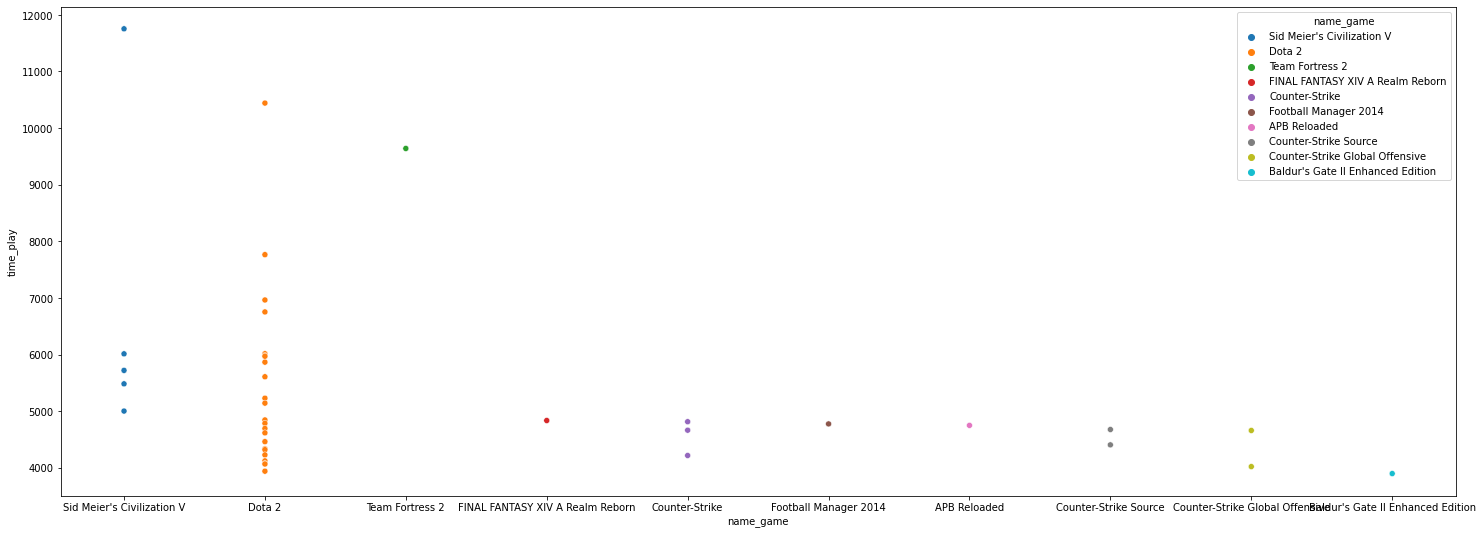

In [186]:
plt.figure(figsize=(25, 9))
sns.scatterplot(data=data_reduce, x='name_game',y='time_play',hue='name_game')

Ici nous n'avons pas les date de sortie, si nous comparons avec l'explosition du streaming
- certains jeux sont très streamer mais compliquer donc moins de joueurs
- jeux qui date de plusieurs années donc forcement plus encreer avec des joueur
- on y ajoute le statut de la marque qui les sorts
- si on regarde les stats de among us, fortnite, on constate que des jeux indé sont mis sous les projecteur grace au streamers
- voir au moment ou les jeux on exploser leurs nombre d'heure de jeux 
- On pourrais ce dire que c'est la popularité du jeux qui ramene les streamer

1. Fall Guys fait son apparition, avec presque 3,7 millions d'heures visionnées en plus cette semaine.  09 août 2020
- On va se baser sur 2020 car twitch a totalement exploser a ce moment:
Le secteur du streaming en direct aurait connu une hausse de 45% entre mars et avril, selon StreamElements et Arsenal.ggs
- Nuage de poid Dota 2

In [187]:

data[data['name_game']=='Counter-Strike']

,id,name_game,time_play
20716,32749624,Counter-Strike,4814.0
158186,22283916,Counter-Strike,4664.0
34836,121900241,Counter-Strike,4217.0
144907,41719717,Counter-Strike,3840.0
107520,66403743,Counter-Strike,3368.0
...,...,...,...
6243,218354629,Counter-Strike,0.1
20645,189858084,Counter-Strike,0.1
80736,25452454,Counter-Strike,0.1
54579,297690673,Counter-Strike,0.1


In [222]:
#Creation du fichier csv baser sur des data
import os
file = open("la.csv", "r")
strD = file.read()
file.close()
strD = strD.replace(",",".")
strD = strD.replace("\t","','")
strD = strD.replace("\n","'\n'")
strD = strD.replace("'",'"')
strD = strD+ "\n"
fileW = open("amongBisData.csv","a")
#Check si il est vide
if os.stat("amongBisData.csv").st_size == 0:
    fileW.write(strD)
    fileW.close()



In [244]:
data_among = pd.read_csv('amongBisData.csv',error_bad_lines=False, engine="python")
data_among['Peak_Players'] =data_among['Peak_Players'].astype(float)
data_among

/home/massmax/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
Skipping line 37: unexpected end of data


,Month,Avg_Players,Gain,Pourcente_Gain,Peak_Players
0,Last 30 Days,6.123.0,-804.9,-11.62%,14.632
1,September 2021,6.927.8,-1.689.0,-19.60%,16.851
2,August 2021,8.616.9,+58.1,+0.68%,17.436
3,July 2021,8.558.7,-1.049.4,-10.92%,19.576
4,June 2021,9.608.1,-1.735.5,-15.30%,21.992
5,May 2021,11.343.5,-8.405.7,-42.56%,28.242
6,April 2021,19.749.3,+3.258.7,+19.76%,97.580
7,March 2021,16.490.5,-7.995.0,-32.65%,130.138
8,February 2021,24.485.5,-17.521.7,-41.71%,75.133
9,January 2021,42.007.2,-24.531.3,-36.87%,118.868


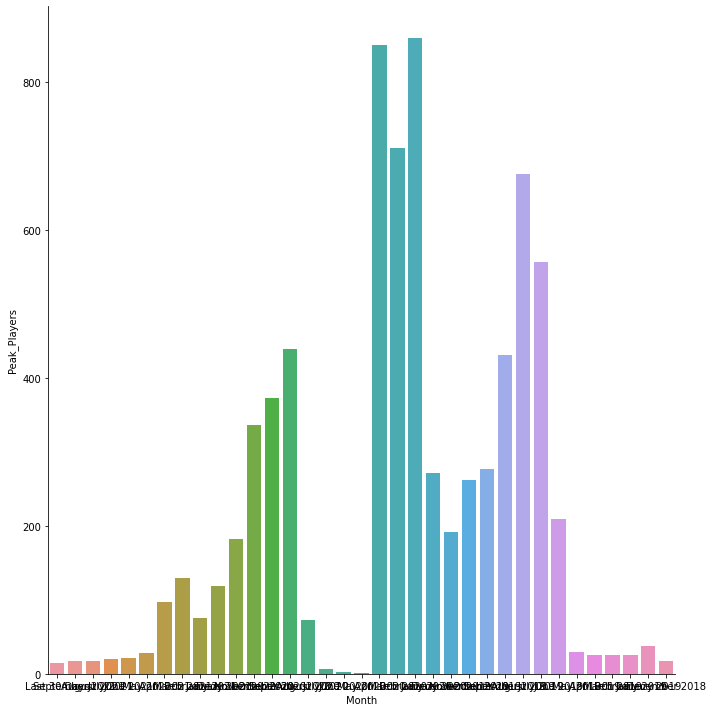

In [242]:

sns.catplot(data=data_among,height=10, y='Peak_Players', x='Month',kind='bar')